<h2>CS 3780/5780 Creative Project: </h2>
<h3>Emotion Classification of Natural Language</h3>

Names and NetIDs for your group members: James Tu (jt737), Andrew Cheung (aec295)

<h3>Introduction:</h3>

<p> The creative project is about conducting a real-world machine learning project on your own, with everything that is involved. Unlike in the programming projects 1-5, where we gave you all the scaffolding and you just filled in the blanks, you now start from scratch. The past programming projects provide templates for how to do this (and you can reuse part of your code if you wish), and the lectures provide some of the methods you can use. So, this creative project brings realism to how you will use machine learning in the real world.  </p>

The task you will work on is classifying texts to human emotions. Through words, humans express feelings, articulate thoughts, and communicate our deepest needs and desires. Language helps us interpret the nuances of joy, sadness, anger, and love, allowing us to connect with others on a deeper level. Are you able to train an ML model that recognizes the human emotions expressed in a piece of text? <b>Please read the project description PDF file carefully and follow the instructions there. Also make sure you write your code and answers to all the questions in this Jupyter Notebook </b> </p>
<p>


<h2>Part 0: Basics</h2><p>

<h3>0.1 Import:</h3><p>
Please import necessary packages to use. Note that learning and using packages are recommended but not required for this project. Some official tutorial for suggested packacges includes:
    
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
https://pytorch.org/tutorials/
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
<p>

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import torch

<h3>0.2 Accuracy and Mean Squared Error:</h3><p>
To measure your performance in the Kaggle Competition, we are using accuracy. As a recap, accuracy is the percent of labels you predict correctly. To measure this, you can use library functions from sklearn. A simple example is shown below. 
<p>

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = [3, 2, 1, 0, 1, 2, 3]
y_true = [0, 1, 2, 3, 1, 2, 3]
accuracy_score(y_true, y_pred)

<h2>Part 1: Basic</h2><p>
Note that your code should be commented well and in part 1.4 you can refer to your comments.

<h3>1.1 Load and preprocess the dataset:</h3><p>
We provide how to load the data on Kaggle's Notebook.
<p>

In [ ]:
# Load the training data
train = pd.read_csv("../data/train.csv")
# Split into text and label
train_text = train["text"]
train_label = train["label"]

# Load the testing data
test = pd.read_csv("../data/test.csv")
# Split into text and id
test_id = test["id"]
test_text = test["text"]


In [ ]:
train.head() # Show the first few rows of training data

In [ ]:
test.head() # Show the first few rows of testing data

### First we split our data into a training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_val = train_test_split(train_text, train_label, test_size=0.2, random_state=42)

### Next we vectorize the training text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english') # Remove stop words
vectorizer_bow = CountVectorizer(stop_words='english') # Remove stop words

# Use TF-IDF vectorizer for sentence embeddings
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Use bag of words vectorizer for sentence embeddings
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

<h3>1.2 Use At Least Two Training Algorithms from class:</h3><p>
You need to use at least two training algorithms from class. You can use your code from previous projects or any packages you imported in part 0.1.

### SVM Model

In [ ]:
from sklearn.svm import SVC

### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

<h3>1.3 Training, Validation and Model Selection:</h3><p>
You need to split your data to a training set and validation set or performing a cross-validation for model selection.

### Training the SVM model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Use grid search to find the best hyperparameters for SVM model
params = {
  'C': [0.001, 0.01, 0.1, 1, 10],
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

grid_search = GridSearchCV(SVC(), params, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {grid_search.best_params_}")

best_C, best_kernel = best_params['C'], best_params['kernel']

# Train SVM model
svm_model = SVC(kernel=best_kernel, C=best_C)
svm_model.fit(X_train_tfidf, y_train) # Use TF-IDF embeddings for SVM

# Predict and calculate accuracy for SVM model
y_pred = svm_model.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_val, y_pred)

print(f'SVM Accuracy: {accuracy_svm}')

### Training the Naive Bayes Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Use grid search to find the best hyperparameters (alpha for Laplace smoothing) for Naive Bayes
params = {'alpha': [0.1 * x for x in range(1, 11)]} # Search alpha values 0.1 to 1
grid_search = GridSearchCV(MultinomialNB(), params, scoring='accuracy')
grid_search.fit(X_train_bow, y_train)

best_alpha = grid_search.best_params_['alpha'] # Get the best alpha value
print(f"Best alpha: {best_alpha}")

nb_model = MultinomialNB(alpha=best_alpha) # Use the best alpha value for Naive Bayes Model
nb_model.fit(X_train_bow, y_train) # Use bag of words embeddings for Naive Bayes

# Predict and calculate accuracy for Naive Bayes model
y_pred_nb = nb_model.predict(X_test_bow)
accuracy_nb = accuracy_score(y_val, y_pred_nb) 
print(f'Naive Bayes Accuracy: {accuracy_nb}')


<h3>1.4 Explanation in Words:</h3><p>
    You need to answer the following questions in the markdown cell after this cell:

1.4.1 How did you formulate the learning problem?

We formulated the learning problem as a text classification problem where we are 
given an input text and our goal is to predict the emotion of the text. In particular, 
we are given an input text as a string and our goal is to classify the text into 1 of
28 different classes (labeled 0 to 27) representing the semantic emotion of the text. Hence, we formulated
this learning problem as a multi-class classification problem.

In order to make the text input useful for machine learning, we need to transform the input
text into vector representations that can be used by our training algorithms. There are several ways
we can vectorize our text, but we decided to use the TF-IDF and Bag of Words vectorization
methods, which we will explain why later on when explain the our model selection. 
The Bag of Words embeddings represent text as vectors of word frequencies, but doesn't consider
the order of words. On the other hand, TF-IDF embeddings weight the frequency of words
against how often they appear, which highlights more unique words and reduces the weight
of commonly used words. To perform these sentence embeddings, we used the sci-kit learn's
TfidfVectorizer and CounterVectorizer, which handles the tokenization of the input text and vector output.
When tokenizing the text, for both vectorizers, we decided to exclude stop words like "and" and "the" as they
do not contribute much to the emotion of a text and can add noise to our vector representations.

1.4.2 Which two learning methods from class did you choose and why did you made the choices?

For the two learning methods from class, we decided to use the SVM and Naive Bayes training algorithms. 
While researching which algorithms to use for this text classification problem, we came across the paper
"Text Categorization with Support Vector Machines" by Thorsten Joachims. In the paper, Joachims 
explores how SVMs are particularly effective at text categorization problems. In particular, 
the paper argues that SVMs are well suited for text categorization since they can 
handle high-dimensional features spaces well, which is common in text data. Additionally,
the paper explain how many text classification problems are linearly seperable in high-dimensional
feature space, which would make SVMs more effective by maximizing margins between classes. For these reasons,
we decided to use SVM as one of our learning methods. For the vector embeddings used as inputs
to the SVM model, we chose to use the TF-IDF embeddings since they provide normalized
weights for terms, which would help prevent the decision boundaries from being skewed. 

For the second learning method, we decided to use Naive Bayes since we felt that it
was the most intuitive. The Naive Bayes training algorithm assumes that the 
features, which in this case are the words, are conditionally independent given the
label, which means that the presence or frequency of a word contributes independently 
to determining the label. Intuitively, text withs words that appear more frequently in a 
text of a certain label should have a higher probability of being assigned that label.
However, we are aware that this assumption of feature independence most likely
will not hold for most text since words in text are often correlated, combining to 
create emotion. While we predict that Naive Bayes would be less effective than SVM due
to its relative simplicity, we decided to use Naive Bayes as a baseline for the
other text classification methods. For the Naive Bayes model, we used the bag 
of words embeddings instead of TF-IDF used with the SVM model. 
This is because Naive Bayes assumes that the features are conditionally
independent given the class label, which aligns with the bag of words embeddings,
since it only represents the frequency of the terms and doesn't add any additional
weights. Hence the freqency of each word in the bag of words embeddings are
directly interpreted as a probabilities by the model. 

1.4.3 How did you do the model selection?

For both SVM and Naive Bayes models, we did hyperparameter tuning to find the best hyperparameters.
In particular, we used GridSearchCV to find the best hyperparameters for each model based
on cross-validated accuracy scores. For the SVM, we tuned two parameters: C and the kernel. 
For the C value, we tested the values: [0.001, 0.01, 0.1, 1, 10]. We chose
these values as they provide a wide range of C values and we limited the highest C
to 10 since we didn't want to choose a C that would overfit the training examples
too much, as a higher C value caused the model to place more importance on minimizing 
misclassifications on the training data. For the kernel, we tested the values 
['linear', 'poly', 'rbf', 'sigmoid'] as these we the kernels types that were
specificed on the scikit learn SVM model. Based on our hyperparameter tuning
we discovered that C = 1 and kernel = 'linear' achieved the highest accuracy on our validation set, so we 
selected those values for our SVM model evaluated on the test set. 

For the Naive Bayes model, we tuned the alpha parameter, which controls the
Laplace smoothing, which ensures that there are no zero probabilities for words
that are not in the training data. Using scikit learn's GridSearchCV, we tested
alpha values from [0.1, 0.2, ..., 1]. We decided to test small alpha values since
we wanted our model to be more sensitive to distinguishing features, which
we predicted would enable our model to more easily differentiate between
different emotions. Based on our results from GridSearchCV, we discovered that
alpha = 0.2 was the most effective on our validation set, so we selected that
alpha for the Naive Bayes model evaluated on the test set.

1.4.4 Does the test performance reach the first baseline "Tiny Piney"? (Please include a screenshot of Kaggle Submission)

For the Naive Bayes model, our submission (nb_predictions.csv), our testing accuracy was 0.58750 so it did not reach the first baseline "Tiney Piney" (0.65170 accuracy).
<!-- ![Naive Bayes Accuracy](../images/NaiveBayes_Accuracy.png) -->

For the SVM model (predictions.csv), our testing accuracy was 0.686000 so we did reach the first baseline "Tiney Piney" (0.65170 accuracy):
![SVM Accuracy](../images/SVM_Accuracy.png)


<h2>Part 2: Be creative!</h2><p>

<h3>2.1 Open-ended Code:</h3><p>
You may follow the steps in part 1 again but making innovative changes like using new training algorithms, etc. Make sure you explain everything clearly in part 2.2. Note that beating "Zero Hero" is only a small portion of this part. Any creative ideas will receive most points as long as they are reasonable and clearly explained.

### BERT

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import torch
import numpy as np
import pandas as pd

# Load BERT tokenizer and model (Commented out because we used BERT initially, but switched to RoBERTa)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(train_label)))

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(set(train_label)))

# Stratified K Fold to ensure class balance between folds
strat_k_fold = StratifiedKFold(n_splits=5)

# Initialize lists to store results
accuracies = []

for fold, (train_idx, val_idx) in enumerate(strat_k_fold.split(train_text, train_label)):

    # Split the data
    X_train_fold, X_val_fold = np.array(train_text)[train_idx], np.array(train_text)[val_idx]
    y_train_fold, y_val_fold = np.array(train_label)[train_idx], np.array(train_label)[val_idx]

    # Tokenize the data
    train_encodings = tokenizer(X_train_fold.tolist(), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(X_val_fold.tolist(), truncation=True, padding=True, max_length=128)

    class EmotionDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

        def __len__(self):
            return len(self.labels)

    train_dataset = EmotionDataset(train_encodings, y_train_fold.tolist())
    val_dataset = EmotionDataset(val_encodings, y_val_fold.tolist())

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',  # specify the output directory
        num_train_epochs=4,
        weight_decay=0.01,
        learning_rate=3e-5,
        load_best_model_at_end=True,
        evaluation_strategy="epoch",
        save_strategy="epoch",
    )

    # Initialize Trainer with EarlyStoppingCallback
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=lambda p: {"accuracy": accuracy_score(p.label_ids, p.predictions.argmax(-1))},
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
    )
    # Train the model
    trainer.train()

    # Evaluate the model
    y_pred = trainer.predict(val_dataset)
    preds = np.argmax(y_pred.predictions, axis=1)
    accuracy = accuracy_score(y_val_fold, preds)
    accuracies.append(accuracy)
    print(f"Fold {fold + 1} Accuracy: {accuracy}")

# Calculate average accuracy
average_accuracy = np.mean(accuracies)
print(f"Average Cross-Validation Accuracy: {average_accuracy}")



<h3>2.2 Explanation in Words:</h3><p>
You need to answer the following questions in a markdown cell after this cell:

2.2.1 How much did you manage to improve performance on the test set? Did you beat "Zero Hero" in Kaggle? (Please include a screenshot of Kaggle Submission)

With our SVM approach, we managed to achieve an accuracy of 0.68600, but with our approach using BERT, we managed to raise the accuracy by 0.0844 to 0.77040. Below is a screenshot of the the kaggle submission accuracy on the leaderboard, our team name is "Lebron James":

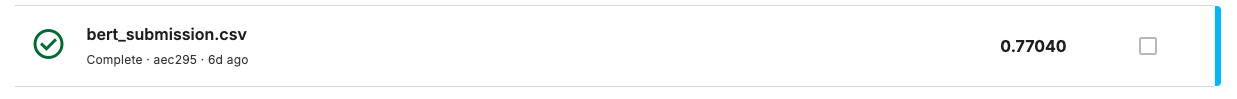

2.2.2 Please explain in detail how you achieved this and what you did specifically and why you tried this.

We were trying to research transformers and existing models for NLP tasks like this one for classifying emotions and came across BERT (Bidirectional Encoder Representations from Transformers). We found that since BERT was designed to understand the contextual meaning of words by considering both the left and right context in a sentence, it would be relevant, useful, and potentially more accurate than other approaches such as Naive Bayes for this particular task of classifying emotions from text, which is oftentimes very dependent on context. We also came across RoBERTa, which builds on BERT with some differences such as including more training data and optimizing hyperparameters like batch size and learning rate. As such, we decided to experiment with both models, and we ultimately decided to move forward with RoBERTa, but kept the BERT tokenizer and model commented out.

Additionally, we wanted to prevent overfitting and generate a more reliable estimate of the model's performance since we were given a smaller training set of 10,000 entries, so we decided to make use of scikit learn's StratifiedKFold for cross-validation with 5 folds. We experimented with certain training parameters as well including the number of epochs, weight decay, and learning rate to avoid overfitting and optimize the model's performance. We also included EarlyStoppingCallback to allows the model to halt training early if the validation accuracy stops improving. Too many epochs could result in the model memorizing the data and too little would result in the model not having enough time to learn for a good performance, so we tried to experiment with the number of epochs around 3-5 since the training set was on the smaller side. We also experimented similarly around 2e-5 to 5e-5 for the learning rate to strike a balance between efficient convergence and avoiding overshooting the minima.



<h2>Part 3: Kaggle Submission</h2><p>
You need to generate a prediction CSV using the following cell from your trained model and submit the direct output of your code to Kaggle. The results should be presented in two columns in csv format: the first column is the data id (0-14999) and the second column includes the predictions for the test set. The first column must be named id and the second column must be named label (otherwise your submission will fail). A sample predication file can be downloaded from Kaggle for each problem. 
We provide how to save a csv file if you are running Notebook on Kaggle.

In [ ]:
# TODO
id = range(15000)
# Vectorize the test data and make predictions
svm_predictions = svm_model.predict(vectorizer_tfidf.transform(test_text))
nb_predictions = nb_model.predict(vectorizer_bow.transform(test_text))

# Save predictions to CSV
svm_submission = pd.DataFrame({'id': id, 'label': svm_predictions})
nb_submission = pd.DataFrame({'id': id, 'label': nb_predictions})

svm_submission.to_csv('../submission/svm_predictions.csv', index=False)
nb_submission.to_csv('../submission/nb_predictions.csv', index=False)

In [ ]:

# Tokenize the test data
test_encodings = tokenizer(test_text.tolist(), truncation=True, padding=True, max_length=128)
test_dataset = EmotionDataset(test_encodings, [0]*len(test_text)) 

# Generate predictions for the test dataset using BERT model
predictions = trainer.predict(test_dataset)
bert_predictions = predictions.predictions.argmax(-1)

# Save predictions to CSV
bert_submission = pd.DataFrame({'id': range(len(bert_predictions)), 'label': bert_predictions})
bert_submission.to_csv('../submission/predictions.csv', index=False)

<h2>Part 4: Resources and Literature Used</h2><p>

Please cite the papers and open resources you used.

Papers:
- SVM paper: https://www.cs.cornell.edu/~tj/publications/joachims_98a.pdf

scikit-learn documentation used:
- TfidfVectorizer: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- CountVectorizer: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- MultinomialNB: https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.MultinomialNB.html
- SVC: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html
- GridSearchCV: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html
- train_test_split: https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
- stratified k fold validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

BERT and RoBERTa resources:
- https://huggingface.co/docs/transformers/en/model_doc/bert 
- https://arxiv.org/pdf/1810.04805
- https://huggingface.co/docs/transformers/en/index
- https://huggingface.co/docs/transformers/en/model_doc/roberta


